In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('log_sensor.csv')

In [3]:
df.describe()

,Temperature,Humidity,CPU Percent,Memory usage,Bytes sent,Bytes received,Packets sent,Packets received,CPU Temperature
count,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000
mean,23.487766,52.151956,4.924097,39.748034,12.787995,24.451092,22836.616314,30782.909806,47.865553
std,1.714731,3.561244,13.694801,19.004656,25.074045,25.579873,26041.364381,29746.776171,4.000791
min,21.200000,40.900000,0.000000,15.000000,0.002827,0.001595,20.000000,11.000000,41.318000
25%,22.200000,49.800000,0.100000,32.500000,4.125949,17.440302,13435.000000,21102.000000,45.084000
50%,22.900000,53.000000,0.200000,33.200000,4.267159,17.517447,14171.000000,21792.000000,46.160000
75%,24.700000,55.000000,0.300000,33.400000,4.493869,17.602734,15685.000000,22665.000000,48.312000
max,29.000000,57.900000,98.000000,98.700000,125.476421,141.619509,132470.000000,205822.000000,62.300000


In [4]:
df

,datetime,Temperature,Humidity,CPU Percent,Memory usage,Bytes sent,Bytes received,Packets sent,Packets received,CPU Temperature
0,2023-04-03 20:51:10.279977,24.2,49.8,80.9,62.9,46.789722,125.969487,117433,181079,52.616
1,2023-04-03 20:51:15.288686,24.2,49.6,34.9,61.7,46.823584,125.977558,117475,181118,51.540
2,2023-04-03 20:51:20.298283,24.3,49.5,30.3,62.5,46.894749,125.990543,117618,181298,51.540
3,2023-04-03 20:51:25.307296,24.3,49.6,40.2,62.4,46.966725,125.997602,117715,181400,52.616
4,2023-04-03 20:51:30.318417,24.3,49.5,39.4,62.9,46.993349,125.998613,117741,181419,51.540
...,...,...,...,...,...,...,...,...,...,...
21338,2023-04-05 15:51:40.762465,25.2,49.6,0.8,24.5,11.640749,18.972483,26780,32599,52.078
21339,2023-04-05 15:51:45.772516,25.1,49.7,2.1,24.5,11.646195,18.980295,26839,32703,52.078
21340,2023-04-05 15:51:50.781923,25.2,49.6,8.2,25.2,11.706786,18.989663,26951,32832,52.078
21341,2023-04-05 15:51:55.790585,25.3,49.8,3.9,25.2,11.727637,18.994555,27006,32900,52.078


In [5]:
# resample data to 1 minute intervals
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.resample('1Min').mean()
df = df.dropna()
df

,Temperature,Humidity,CPU Percent,Memory usage,Bytes sent,Bytes received,Packets sent,Packets received,CPU Temperature
datetime,,,,,,,,,
2023-04-03 20:51:00,24.260000,49.600000,60.580000,65.320000,47.002762,126.233566,117823.000000,181603.200000,53.207800
2023-04-03 20:52:00,24.250000,49.591667,91.733333,77.083333,47.651276,130.539965,120094.583333,186221.750000,57.816667
2023-04-03 20:53:00,24.250000,49.566667,81.041667,82.591667,48.455435,137.804057,123257.583333,193196.166667,58.444333
2023-04-03 20:54:00,24.300000,49.600000,55.200000,87.166667,48.805592,139.512969,124457.833333,195084.166667,56.964833
2023-04-03 20:55:00,24.283333,49.541667,63.950000,89.675000,49.195470,140.405671,125396.166667,196489.333333,57.233833
...,...,...,...,...,...,...,...,...,...
2023-04-05 15:48:00,25.291667,49.216667,0.766667,22.900000,11.381030,18.910185,26205.666667,32022.000000,51.629667
2023-04-05 15:49:00,25.225000,49.800000,2.333333,23.250000,11.422043,18.931873,26318.916667,32127.416667,51.719333
2023-04-05 15:50:00,25.225000,49.608333,1.066667,24.441667,11.638243,18.970730,26757.333333,32575.583333,52.122833


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
# Create a dictionary to store models and their hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.5),
    "Lasso": Lasso(alpha=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=3),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.001)
}

# Train and evaluate each model using KFold cross validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
results = {}
for name, model in models.items():
    mse_scores = []
    r2_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    results[name] = {'MSE': sum(mse_scores)/n_splits, 'R2 Score': sum(r2_scores)/n_splits}

# Choose the best model based on the specified evaluation metric
metric = 'R2 Score'
best_model = max(results, key=lambda x: results[x][metric])
print(f'Best model based on {metric}: {best_model}')
print(f'Best Score based on {metric}: {results[best_model][metric]}')

/home/ubuntu/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best model based on R2 Score: Gradient Boosting
Best Score based on R2 Score: 0.9858352705564768


/home/ubuntu/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the best model based on R2 score
best_model_name = 'Gradient Boosting'
best_model = models[best_model_name]

# Train the best model on the full dataset
best_model.fit(X, y)

# Perform feature selection using SelectKBest
k = 8  # Number of top features to select
selector = SelectKBest(f_regression, k=k)
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
feature_names = df.columns[:-1]
selected_feature_names = [feature_names[i] for i in selected_indices]

# Print the selected feature names
print(f'Top {k} features selected by {best_model_name}: {selected_feature_names}')


Top 8 features selected by Gradient Boosting: ['Temperature', 'Humidity', 'CPU Percent', 'Memory usage', 'Bytes sent', 'Bytes received', 'Packets sent', 'Packets received']


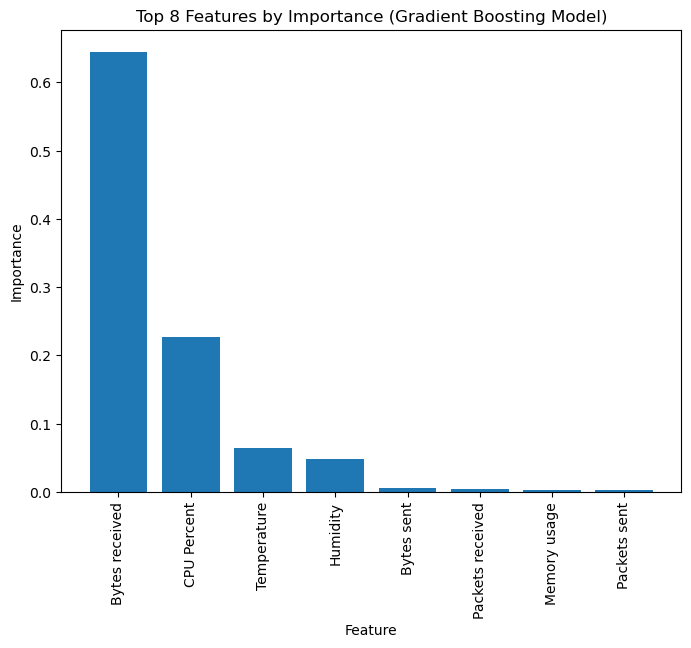

In [10]:
import matplotlib.pyplot as plt

# Get the feature importances from the trained Random Forest model
importances = best_model.feature_importances_[selected_indices]

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]

# Plot the sorted feature importances
plt.figure(figsize=(8, 6))
plt.title(f'Top {k} Features by Importance ({best_model_name} Model)')
plt.bar(range(k), sorted_importances, align='center')
plt.xticks(range(k), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [11]:
# re fit the model with the selected features
from sklearn.model_selection import train_test_split
X = df[['Bytes received','CPU Percent','Temperature']].values
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')



MSE: 0.18128837538919376
R2 Score: 0.9875292079173209


In [12]:
#find the range of values in the data to simulate
df.describe()

,Temperature,Humidity,CPU Percent,Memory usage,Bytes sent,Bytes received,Packets sent,Packets received,CPU Temperature
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,23.490750,52.111948,5.086599,40.711210,14.426815,26.098969,24311.160972,32407.582895,47.981248
std,1.719368,3.572325,13.080181,20.255713,28.127572,28.790714,28316.120364,32314.134757,4.048885
min,21.366667,41.066667,0.108333,20.560000,0.007761,0.013979,64.200000,42.000000,42.125000
25%,22.183333,49.754167,0.150000,32.500000,4.127351,17.440944,13440.000000,21111.750000,45.397833
50%,22.908333,52.833333,0.175000,33.200000,4.271936,17.519802,14199.083333,21817.333333,46.160000
75%,24.670833,54.975000,0.208333,33.483333,4.503295,17.611215,15792.000000,22731.916667,48.356833
max,28.916667,57.850000,91.733333,98.700000,125.476421,141.619222,132467.500000,205819.500000,60.282500


In [13]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

#save the scaler to disk
filename = 'finalized_scaler.sav'
pickle.dump(sc, open(filename, 'wb'))

<Axes: >

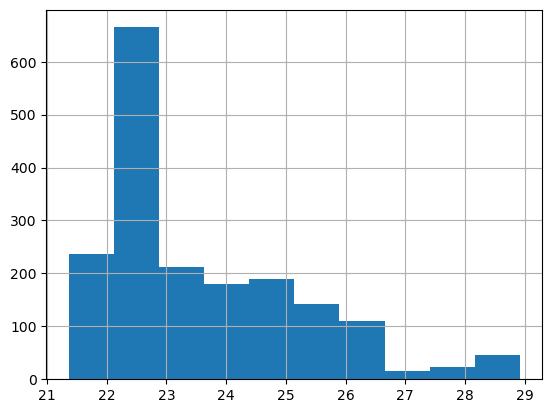

In [15]:
# plot histogram of the data
df['Temperature'].hist()

<Axes: >

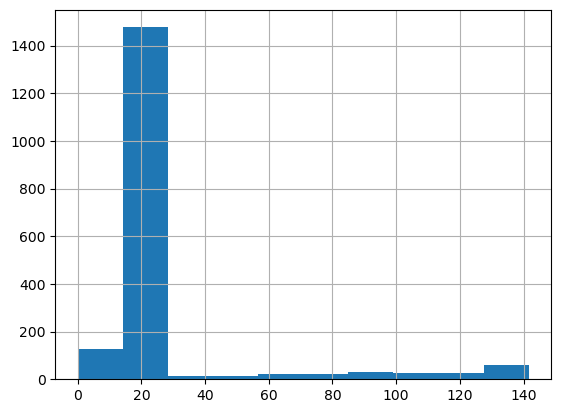

In [16]:
df['Bytes received'].hist()

<Axes: >

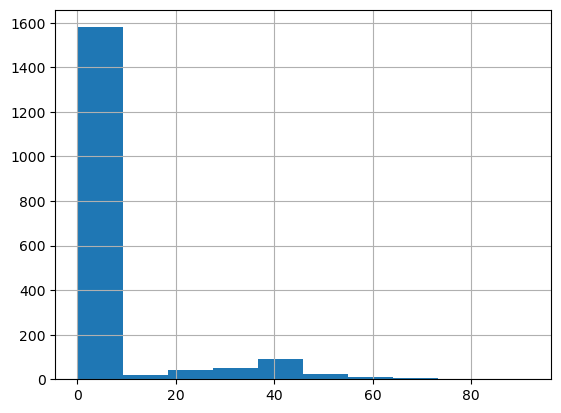

In [17]:
df['CPU Percent'].hist()

<Axes: >

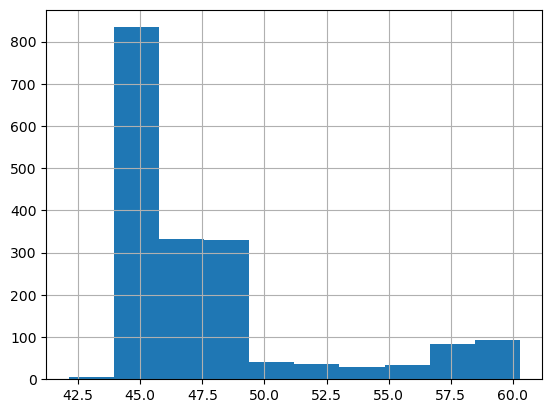

In [18]:
df['CPU Temperature'].hist()